In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
%load_ext jupyter_black

In [3]:
file_names = [x for x in os.listdir() if ".xlsb" in x]

# Iterate over each file and read it into a dataframe
dfs = []
for file in file_names:
    df = pd.read_excel(file, sheet_name='Data', engine='pyxlsb')
    dfs.append(df)



In [4]:
import pickle

with open("CMI_DB_data1.pkl", "rb") as f:
    combined_df = pickle.load(f)

In [5]:
combined_df["Actual_deaths"] = (
    combined_df["AmountIncurred"] / combined_df["AmountsExposure"]
)
combined_df["Actual_deaths_lives"] = (
    combined_df["IncurredClaims"] / combined_df["LivesExposure"]
)
combined_df["Expected_deaths"] = (
    combined_df["ExpectedAmountClaims"] / combined_df["AmountsExposure"]
)
combined_df["Expected_deaths_lives"] = (
    combined_df["ExpectedClaims"] / combined_df["LivesExposure"]
)

In [6]:
combined_df = combined_df[combined_df["LivesExposure"] != 0]
combined_df.drop("ComparatorTable", axis=1, inplace=True)

In [24]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2534252 entries, 0 to 2535448
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ProductCategory        object 
 1   Gender                 object 
 2   SmokerStatus           object 
 3   DistributionChannel    object 
 4   CommencementYear       int64  
 5   JointLifeStatus        object 
 6   SumAssuredBand         object 
 7   Age                    int64  
 8   Duration               int64  
 9   LivesExposure          float64
 10  AmountsExposure        float64
 11  IncurredClaims         float64
 12  AmountIncurred         float64
 13  ExpectedClaims         float64
 14  ExpectedAmountClaims   float64
 15  Actual_deaths          float64
 16  Actual_deaths_lives    float64
 17  Expected_deaths        float64
 18  Expected_deaths_lives  float64
dtypes: float64(10), int64(3), object(6)
memory usage: 386.7+ MB


In [9]:
combined_df["CommencementYear"].unique()

array(['2001', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '1999 or earlier', '2000', '2002', '2017', '2018', '2019', '2020'],
      dtype=object)

In [16]:
def CommencementYear_change(CommencementYear):
    if CommencementYear == "1999 or earlier":
        new_cy = 1
    else:
        new_cy = max(int(CommencementYear) - 1999 + 1, 0)
    return new_cy

In [22]:
combined_df["CommencementYear"] = combined_df["CommencementYear"].apply(
    CommencementYear_change
)

In [18]:
def Duration_change(Duration):
    if Duration == "10+":
        dur = 10
    else:
        dur = max(int(Duration), 0)
    return dur

In [23]:
combined_df["Duration"] = combined_df["Duration"].apply(Duration_change)

In [25]:
grouped_df = combined_df.groupby(
    [
        "ProductCategory",
        "Gender",
        "SmokerStatus",
        "DistributionChannel",
        "CommencementYear",
        "JointLifeStatus",
        "SumAssuredBand",
        "Age",
        "Duration",
    ]
).mean()
grouped_df = grouped_df.reset_index()

In [27]:
# combined_df=grouped_df
combined_df.drop(
    [
        "AmountsExposure",  #'IncurredClaims',
        "AmountIncurred",
        "ExpectedClaims",
        "ExpectedAmountClaims",  # 'ComparatorTable'
    ],
    axis=1,
    inplace=True,
)

In [29]:
combined_df = combined_df[combined_df["Actual_deaths_lives"] <= 1]

In [31]:
data = (
    combined_df.copy()
    .drop(["Expected_deaths", "Actual_deaths", "Expected_deaths_lives"], axis=1)
    .copy()
)

C:\Users\u013709\AppData\Local\Temp\ipykernel_34320\325426435.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\u013709\AppData\Local\Temp\ipykernel_34320\325426435.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\u013709\AppData\Local\Temp\ipykernel_34320\325426435.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\u013709\AppData\Local\Temp\ipykernel_34320\325426435.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\u013709\AppData\Local\Temp\ipykernel_34320\325426435.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


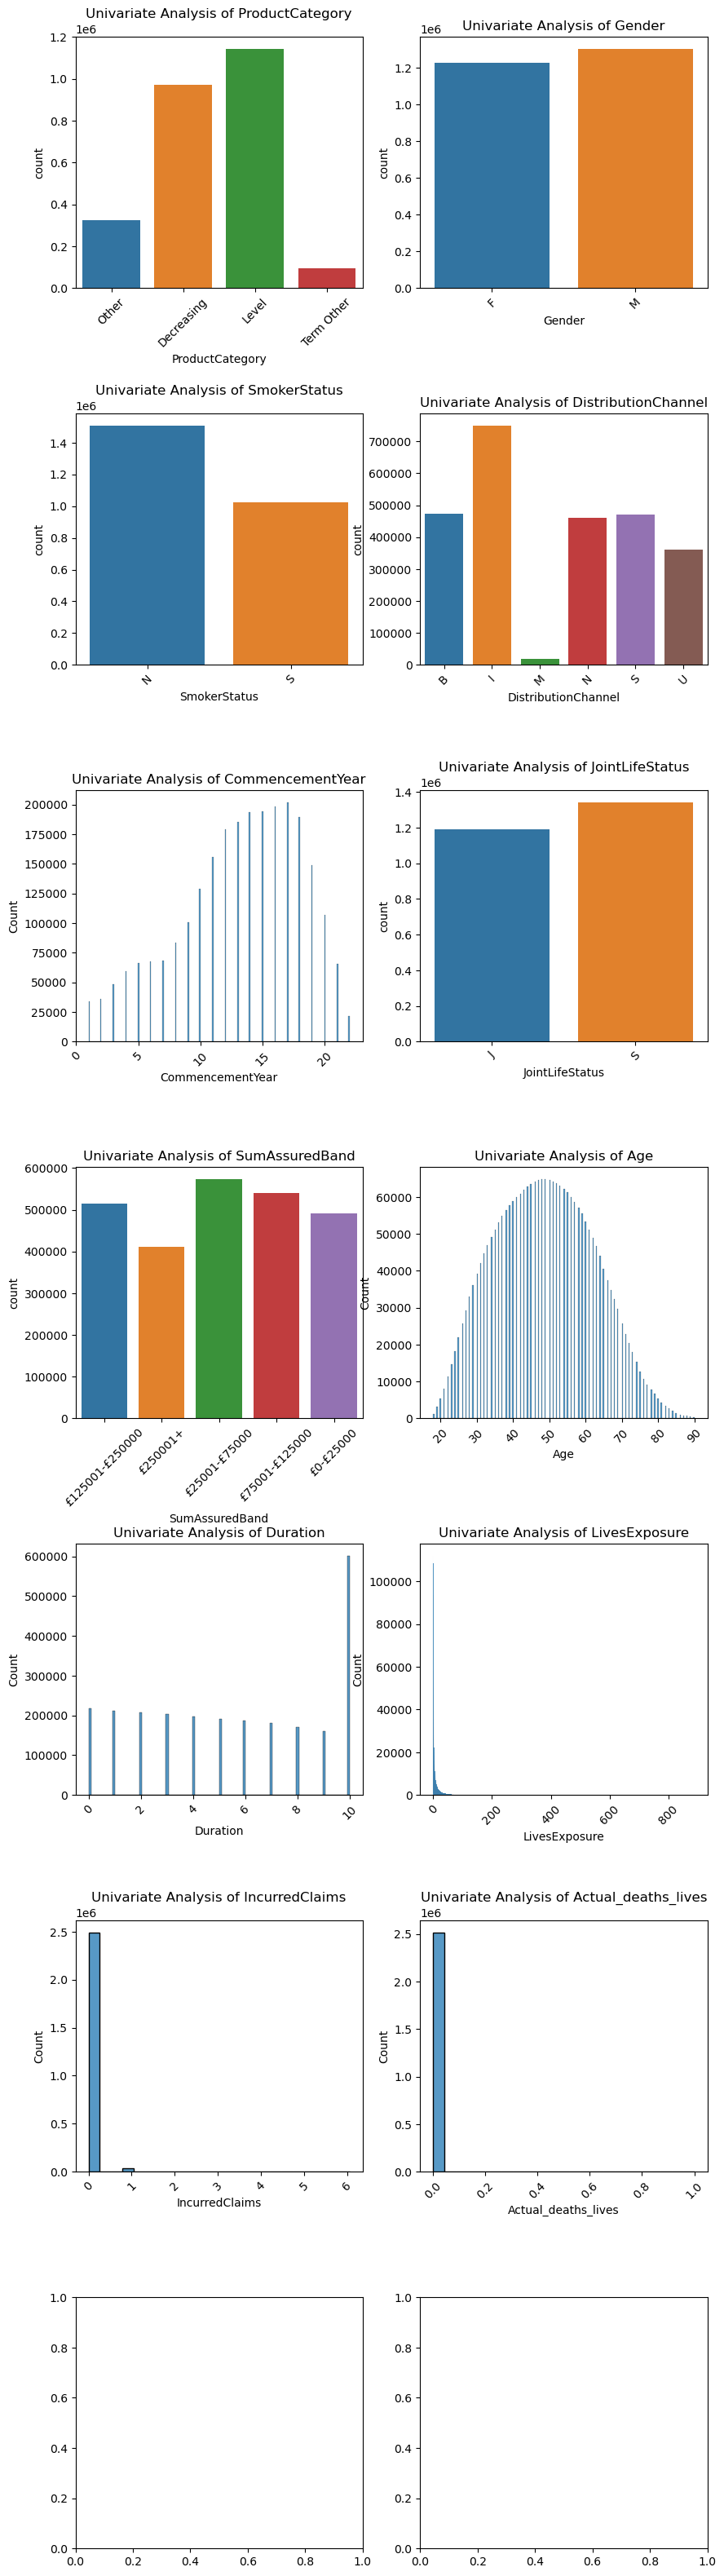

In [32]:
# Univariate plots

no_col = len(data.columns)
fig, axes = plt.subplots(nrows=(no_col // 2 + 1), ncols=2, figsize=(10, 40))
for i, column in enumerate(data.columns):
    if len(data[column].unique()) > 3 and pd.api.types.is_numeric_dtype(data[column]):
        ax = sns.histplot(data[column], ax=axes[i // 2, i % 2])
    else:
        ax = sns.countplot(x=column, data=data, ax=axes[i // 2, i % 2])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    axes[i // 2, i % 2].set_title(f"Univariate Analysis of {column}")
    plt.subplots_adjust(hspace=0.5)

plt.show()

C:\Users\u013709\AppData\Local\Temp\ipykernel_34320\2646121462.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


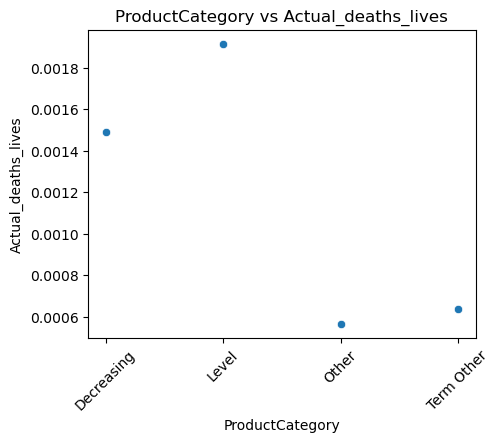

C:\Users\u013709\AppData\Local\Temp\ipykernel_34320\2646121462.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


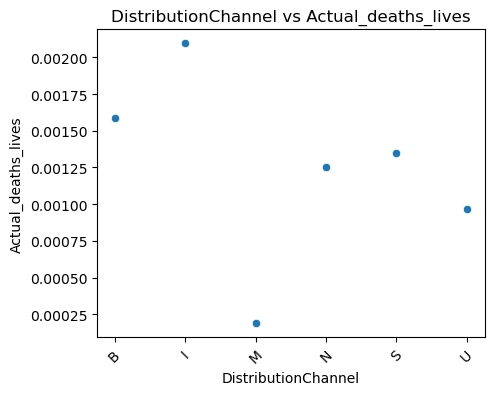

C:\Users\u013709\AppData\Local\Temp\ipykernel_34320\2646121462.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


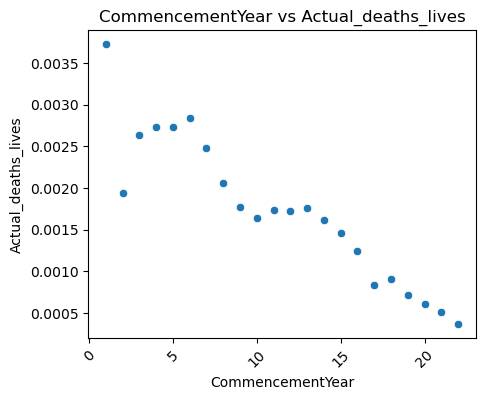

C:\Users\u013709\AppData\Local\Temp\ipykernel_34320\2646121462.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


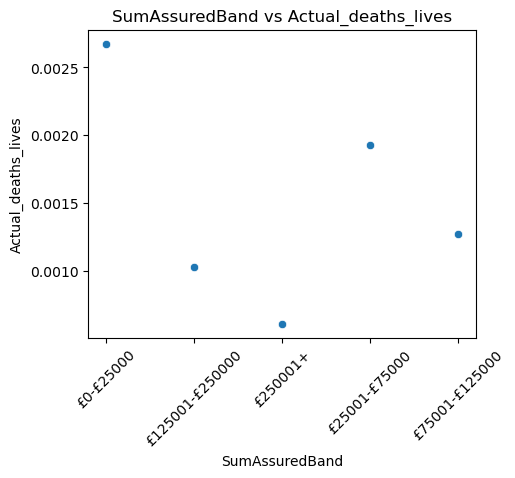

C:\Users\u013709\AppData\Local\Temp\ipykernel_34320\2646121462.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


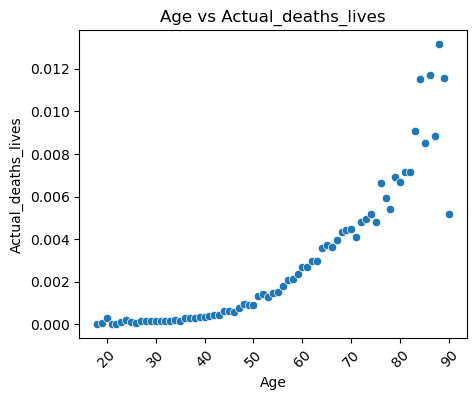

C:\Users\u013709\AppData\Local\Temp\ipykernel_34320\2646121462.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


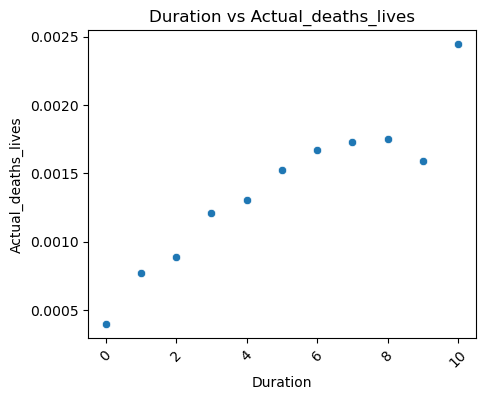

C:\Users\u013709\AppData\Local\Temp\ipykernel_34320\2646121462.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


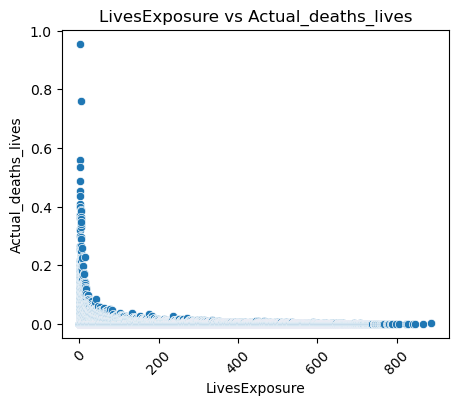

C:\Users\u013709\AppData\Local\Temp\ipykernel_34320\2646121462.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


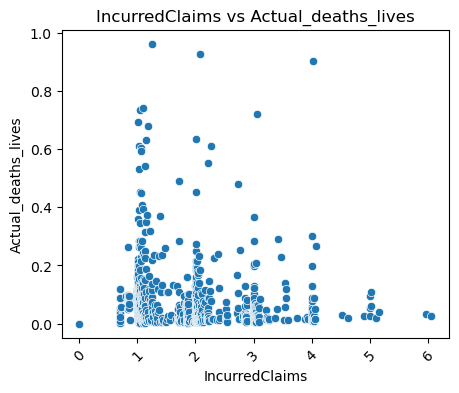

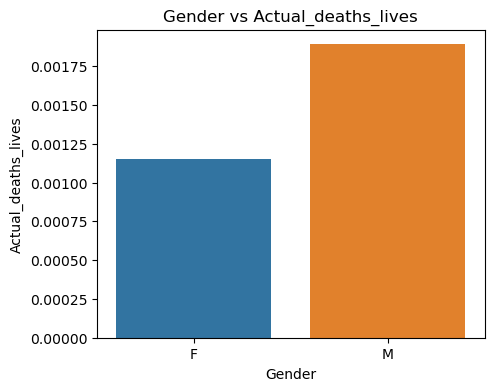

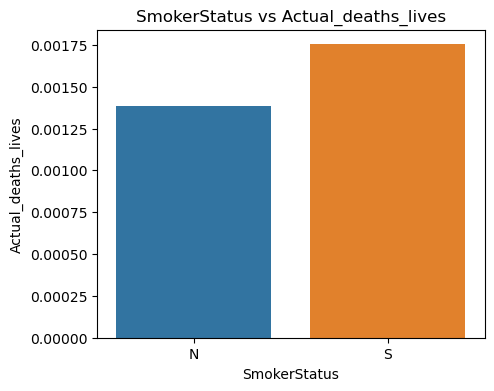

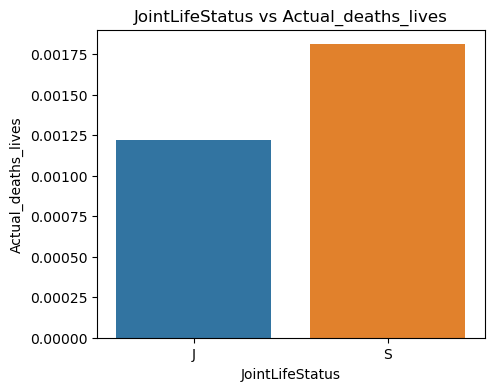

In [35]:
no_col = len(data.columns)
continuous_vars = []
categorical_vars = []
Target = "Actual_deaths_lives"  #'Actual_deaths_lives'
for i, column in enumerate(
    data.drop([Target], axis=1).columns
):  # ,'Expected_deaths_lives'], axis=1).columns):
    if len(data[column].unique()) > 3:
        continuous_vars.append(column)
    else:
        categorical_vars.append(column)


for var in continuous_vars:
    plt.figure(figsize=(5, 4))
    ax = sns.scatterplot(
        x=var,
        y=f"{Target}",
        data=data[[f"{var}", f"{Target}"]].groupby([f"{var}"]).mean(),
    )
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.title(f"{var} vs {Target}")
    plt.show()

# Box plots for categorical variables vs target
for var in categorical_vars:
    plt.figure(figsize=(5, 4))
    ax = sns.barplot(
        x=var,
        y=f"{Target}",
        data=data[[f"{var}", f"{Target}"]].groupby([f"{var}"]).mean().reset_index(),
    )

    plt.title(f"{var} vs {Target}")
    plt.show()

plt.show()

In [40]:
combined_df_encoded = pd.get_dummies(combined_df, drop_first=True)

In [41]:
combined_df_encoded = combined_df_encoded.apply(
    lambda x: x.astype(int) if x.dtypes == "bool" else x
)
combined_df_encoded.drop(
    ["Actual_deaths", "Expected_deaths", "Expected_deaths_lives"], axis=1, inplace=True
)

In [42]:
combined_df_encoded.dtypes

CommencementYear                    int64
Age                                 int64
Duration                            int64
LivesExposure                     float64
IncurredClaims                    float64
Actual_deaths_lives               float64
ProductCategory_Level               int32
ProductCategory_Other               int32
ProductCategory_Term Other          int32
Gender_M                            int32
SmokerStatus_S                      int32
DistributionChannel_I               int32
DistributionChannel_M               int32
DistributionChannel_N               int32
DistributionChannel_S               int32
DistributionChannel_U               int32
JointLifeStatus_S                   int32
SumAssuredBand_£125001-£250000      int32
SumAssuredBand_£250001+             int32
SumAssuredBand_£25001-£75000        int32
SumAssuredBand_£75001-£125000       int32
dtype: object

In [594]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import numpy as np

df = combined_df_encoded.drop("Actual_deaths_lives", axis=1).copy()
df["LivesExposure"] = df["LivesExposure"].clip(
    lower=1e-6
)  # Ensure no zero or negative values

# Split data
X = df.drop(
    ["IncurredClaims", "LivesExposure"], axis=1
)  # Remove LivesExposure from features
y = df["IncurredClaims"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Add a constant term for the intercept
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit the Poisson regression model with LivesExposure as an offset
poisson_model = sm.GLM(
    y_train,
    X_train,
    family=sm.families.Poisson(),
    offset=np.log(df.loc[X_train.index, "LivesExposure"]),
).fit()

# Print the summary of the model
print(poisson_model.summary())

# Predict on the test set
y_pred = poisson_model.predict(
    X_test, offset=np.log(df.loc[X_test.index, "LivesExposure"])
)


# Show the predicted values along with the target values
predicted_vs_actual = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})

                 Generalized Linear Model Regression Results                  
Dep. Variable:         IncurredClaims   No. Observations:              2025724
Model:                            GLM   Df Residuals:                  2025705
Model Family:                 Poisson   Df Model:                           18
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.3235e+05
Date:                Mon, 16 Sep 2024   Deviance:                   1.9618e+05
Time:                        14:51:06   Pearson chi2:                 1.65e+06
No. Iterations:                     8   Pseudo R-squ. (CS):            0.02122
Covariance Type:            nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

<Axes: >

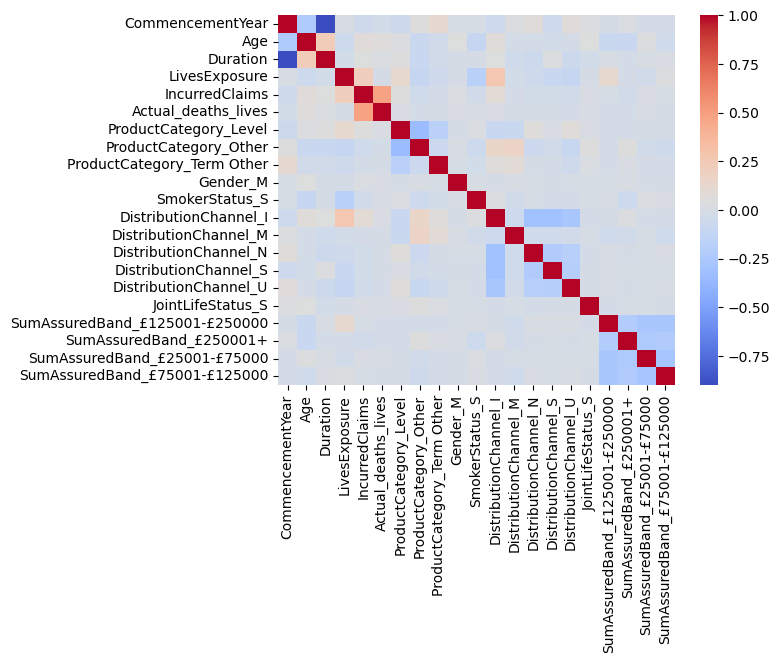

In [598]:
sns.heatmap(combined_df_encoded.corr(), cmap="coolwarm", annot=False)

####  There is collinearity between distribution chaneels , commencement year and probaly product category

In [48]:
combined_df_encoded.columns

Index(['CommencementYear', 'Age', 'Duration', 'LivesExposure',
       'IncurredClaims', 'Actual_deaths_lives', 'ProductCategory_Level',
       'ProductCategory_Other', 'ProductCategory_Term Other', 'Gender_M',
       'SmokerStatus_S', 'DistributionChannel_I', 'DistributionChannel_M',
       'DistributionChannel_N', 'DistributionChannel_S',
       'DistributionChannel_U', 'JointLifeStatus_S',
       'SumAssuredBand_£125001-£250000', 'SumAssuredBand_£250001+',
       'SumAssuredBand_£25001-£75000', 'SumAssuredBand_£75001-£125000'],
      dtype='object')

### Poisson distribution modelling

Input Layer
    |
    v
+---------------------+
| Original Features   |
+---------------------+
    |
    v
+---------------------+
| Interaction Terms   |
| (agr, duration*,    |
|  commencement_year*)|
+---------------------+
    |
    v
+---------------------+
| Concatenation Layer |
+---------------------+
    |
    v
+---------------------+
| Fully Connected     |
| Layer               |
+---------------------+
    |
    v
+---------------------+
| Exp transform       |
+---------------------+
    |
    v
Output Layer


In [660]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np


df = combined_df_encoded.copy()
df["Age2"] = np.maximum(df["Age"] - 40, 0) ** 2  # np.exp(df['Age'])
df["LivesExposure"] = df["LivesExposure"].clip(
    lower=1e-6
)  # Ensure no zero or negative values;w we did filter out few cases earlier
df["IncurredClaims"] = df["IncurredClaims"]
# Split data
X = df.drop(
    ["IncurredClaims", "LivesExposure", "Actual_deaths_lives"], axis=1
)  # Exclude LivesExposure from input features
y = df["IncurredClaims"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

# Convert data to tensors
X_train_tensor = torch.tensor(X_train_scaled.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values.reshape(-1, 1), dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values.reshape(-1, 1), dtype=torch.float32)

# Convert LivesExposure to tensors
lives_exposure_train_tensor = torch.tensor(
    df.loc[X_train.index, "LivesExposure"].values.reshape(-1, 1), dtype=torch.float32
)
lives_exposure_test_tensor = torch.tensor(
    df.loc[X_test.index, "LivesExposure"].values.reshape(-1, 1), dtype=torch.float32
)


# NN with custom interaction layer and offset
class Mort_Net(nn.Module):
    def __init__(self):
        super(Mort_Net, self).__init__()

        # Identify the indices of the specific columns
        self.age_idx = X_train_scaled.columns.get_loc("Age")
        self.duration_indices = [
            i
            for i, col in enumerate(X_train_scaled.columns)
            if col.startswith("Duration")
        ]
        self.commencement_year_indices = [
            i
            for i, col in enumerate(X_train_scaled.columns)
            if col.startswith("CommencementYear")
        ]

        # Define the fully connected layer
        interaction_input_size = len(self.duration_indices) + len(
            self.commencement_year_indices
        )
        self.fc2 = nn.Linear(
            len(X_train_scaled.columns) + interaction_input_size, 1
        )  # Include original features and interaction terms

    def forward(self, x, exposure):
        # Create interaction terms
        age_feature = x[:, self.age_idx].unsqueeze(1)
        interaction_terms = []  # torch.tensor(data=[], dtype=torch.float32)
        for idx in (
            self.duration_indices + self.commencement_year_indices  # + [self.age_idx]
        ):
            interaction_term = age_feature * x[:, idx].unsqueeze(1)
            interaction_terms.append(interaction_term)
            # print(interaction_term)

            # interaction_terms= torch.tensor(data=[], dtype=torch.float32)
            interaction_terms1 = torch.cat(interaction_terms, dim=1)
        # Concatenate the original features with interaction terms

        x_combined = torch.cat((x, interaction_terms1), dim=1)

        # Final fully connected layer
        linear_output = self.fc2(x_combined)

        # Adding the log of the exposure as an offset
        offset_output = linear_output + torch.log(exposure)

        # Apply exponential activation to ensure positive output
        output = torch.exp(offset_output)

        return output


model = Mort_Net()
criterion = nn.PoissonNLLLoss(log_input=False)  # nn.MSELoss()#
optimizer = optim.Adam(
    model.parameters(), lr=0.1, weight_decay=0.00005
)  # Lower learning rate


def l1_loss(model, lambda_l1):
    l1 = 0
    for param in model.parameters():
        l1 += torch.sum(torch.abs(param))
    return lambda_l1 * l1


for epoch in range(650):
    optimizer.zero_grad()
    outputs = model(X_train_tensor, lives_exposure_train_tensor)
    loss = criterion(outputs, y_train_tensor) + l1_loss(model, lambda_l1=0.0008)
    if torch.isnan(loss):
        print(f"Epoch {epoch+1}, Loss: NaN detected")
        break
    l1_reg = l1_loss(model, lambda_l1=0.0008)
    total_loss = loss + l1_reg
    total_loss.backward()
    optimizer.step()
    if (epoch + 1) % 20 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item()}")

model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor, lives_exposure_test_tensor)
    loss = criterion(outputs, y_test_tensor)
    print(f"Test Loss: {loss.item()}")

Epoch 20, Loss: 1.9054359197616577
Epoch 40, Loss: 0.7633719444274902
Epoch 60, Loss: 0.4940449595451355
Epoch 80, Loss: 0.3778376579284668
Epoch 100, Loss: 0.3078709840774536
Epoch 120, Loss: 0.26007863879203796
Epoch 140, Loss: 0.2254869043827057
Epoch 160, Loss: 0.19957409799098969
Epoch 180, Loss: 0.17964661121368408
Epoch 200, Loss: 0.1639881432056427
Epoch 220, Loss: 0.15146096050739288
Epoch 240, Loss: 0.1412809044122696
Epoch 260, Loss: 0.1328941434621811
Epoch 280, Loss: 0.12590095400810242
Epoch 300, Loss: 0.12000875174999237
Epoch 320, Loss: 0.11499510705471039
Epoch 340, Loss: 0.11069338023662567
Epoch 360, Loss: 0.10697439312934875
Epoch 380, Loss: 0.10373435169458389
Epoch 400, Loss: 0.10089525580406189
Epoch 420, Loss: 0.09839145094156265
Epoch 440, Loss: 0.09617115557193756
Epoch 460, Loss: 0.0941927507519722
Epoch 480, Loss: 0.09242168813943863
Epoch 500, Loss: 0.09082933515310287
Epoch 520, Loss: 0.08939331769943237
Epoch 540, Loss: 0.08808904886245728
Epoch 560, Loss

In [ ]:
import optuna
from sklearn.metrics import r2_score


def objective(trial):
    global y_test_tensor
    lr = trial.suggest_float("lr", 1e-2, 1e-1, log=True)
    weight_decay = trial.suggest_float("weight_decay", 1e-5, 1e-2, log=True)
    num_epochs = trial.suggest_int("num_epochs", 200, 700)
    lambda_l1 = trial.suggest_float("lambda_l1", 1e-5, 1e-1, log=True)
    model = Mort_Net()
    criterion = nn.PoissonNLLLoss(log_input=False)
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train_tensor, lives_exposure_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        l1_reg = l1_loss(model, lambda_l1=lambda_l1)
        total_loss = loss + l1_reg
        total_loss.backward()

        optimizer.step()

    model.eval()
    with torch.no_grad():
        outputs = model(X_test_tensor, lives_exposure_test_tensor)
        # r2 = r2_score(y_test_tensor.numpy(), outputs.numpy())
        y_test_tensor = y_test_tensor + 1e-8
        mean_target = torch.mean(y_test_tensor)
        null_deviance = 2 * torch.sum(
            y_test_tensor * torch.log(y_test_tensor / mean_target)
            - (y_test_tensor - mean_target)
        )
        model_deviance = 2 * torch.sum(
            y_test_tensor * torch.log(y_test_tensor / outputs)
            - (y_test_tensor - outputs)
        )
        poisson_deviance = null_deviance - model_deviance

    print(f"Poisson Deviance: {poisson_deviance.item():.4f}")
    print(
        f"LR: {lr} weight_decay: {weight_decay} num_epochs: {num_epochs}  mean {np.mean(outputs.numpy().flatten())} \
                std {np.std(outputs.numpy().flatten())}  poisson_deviance : {poisson_deviance}"
    )
    return poisson_deviance


# optimize the objective function
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)


print("Best hyperparameters: ", study.best_params)

In [661]:
import numpy as np

y_test_tensor = y_test_tensor + 1e-8
# mean_target = torch.mean(lives_exposure_test_tensor * y_test_tensor)
# null_deviance = 2 * torch.sum(
#    lives_exposure_test_tensor * y_test_tensor * torch.log(y_test_tensor / mean_target)
#    - lives_exposure_test_tensor * (y_test_tensor - mean_target)
# )
# model_deviance = 2 * torch.sum(
#    lives_exposure_test_tensor * y_test_tensor * torch.log(y_test_tensor / outputs)
#    - lives_exposure_test_tensor * (y_test_tensor - outputs)
# )
# poisson_deviance = null_deviance - model_deviance

mean_target = torch.mean(y_test_tensor)
null_deviance = 2 * torch.sum(
    y_test_tensor * torch.log(y_test_tensor / mean_target)
    - (y_test_tensor - mean_target)
)
model_deviance = 2 * torch.sum(
    y_test_tensor * torch.log(y_test_tensor / outputs) - (y_test_tensor - outputs)
)
poisson_deviance = null_deviance - model_deviance
print(f"poisson deviance: {poisson_deviance}")
y_pred = outputs.numpy().flatten()

poisson deviance: 14266.65625


In [662]:
X_test_df = pd.DataFrame(X_test, columns=X_test.columns)
y_test_df = pd.DataFrame(y_test, columns=["IncurredClaims"])  # Expected_deaths_lives


test_df = pd.concat([X_test_df, y_test_df], axis=1)


test_df["Predicted_Claims"] = y_pred


filtered_combined_df = combined_df.loc[test_df.index]

# Add the predicted values to the filtered combined DataFrame
filtered_combined_df["Predicted_Claims"] = test_df["Predicted_Claims"].values  # /100
filtered_combined_df["Predicted_Claims_rate"] = (
    filtered_combined_df["Predicted_Claims"] / filtered_combined_df["LivesExposure"]
)
filtered_combined_df.head(5)

,ProductCategory,Gender,SmokerStatus,DistributionChannel,CommencementYear,JointLifeStatus,SumAssuredBand,Age,Duration,LivesExposure,IncurredClaims,Actual_deaths,Actual_deaths_lives,Expected_deaths,Expected_deaths_lives,Predicted_Claims,Predicted_Claims_rate
410655,Level,M,N,S,13,S,£250001+,45,5,16.013661,0.0,0.0,0.0,0.000628,0.000628,0.032397,0.002023
1620761,Decreasing,F,N,U,21,J,£250001+,57,0,0.479452,0.0,0.0,0.0,0.000575,0.000575,0.002527,0.005271
1397337,Level,M,N,N,19,J,£25001-£75000,25,1,1.380822,0.0,0.0,0.0,0.000196,0.000196,0.001818,0.001317
2061625,Term Other,M,N,M,20,J,£25001-£75000,36,2,0.547541,0.0,0.0,0.0,0.000259,0.000259,0.001962,0.003583
82314,Decreasing,F,N,B,15,S,£25001-£75000,44,3,27.308743,0.0,0.0,0.0,0.000458,0.000458,0.056287,0.002061


In [663]:
X_test["Expected_deaths_lives"] = filtered_combined_df[
    filtered_combined_df.index.isin(X_test.index)
]["Expected_deaths_lives"]
X_test["Actual_deaths_lives"] = filtered_combined_df[
    filtered_combined_df.index.isin(X_test.index)
]["Actual_deaths_lives"]

In [664]:
actual_mean = np.sum(
    lives_exposure_test_tensor.numpy() * (y_test.values.reshape(-1, 1))
) / np.sum(lives_exposure_test_tensor.numpy())
predicted_mean = np.sum(
    lives_exposure_test_tensor.numpy() * (y_pred.reshape(-1, 1))
) / np.sum(lives_exposure_test_tensor.numpy())
expected_deaths_mean = np.sum(
    lives_exposure_test_tensor.numpy()
    * (X_test["Expected_deaths_lives"].values.reshape(-1, 1))
) / np.sum(lives_exposure_test_tensor.numpy())
actual_deaths_mean = np.sum(
    lives_exposure_test_tensor.numpy()
    * (X_test["Actual_deaths_lives"].values.reshape(-1, 1))
) / np.sum(lives_exposure_test_tensor.numpy())
print(f"Actual Mean: {actual_mean}")
print(f"Predicted Mean: {predicted_mean}")
print(f"expected_deaths_mean: {expected_deaths_mean}")
print(f"actual_deaths_mean: {actual_deaths_mean}")

Actual Mean: 0.10193600096680397
Predicted Mean: 0.16247428953647614
expected_deaths_mean: 0.0013106690841431636
actual_deaths_mean: 0.0012521916269368479


In [665]:
filtered_combined_df["Predicted_Claims_rate"] = (
    filtered_combined_df["Predicted_Claims"] / filtered_combined_df["LivesExposure"]
)

##### plot of high level trends for predicted  followed by partial dependence plots( to be developed)

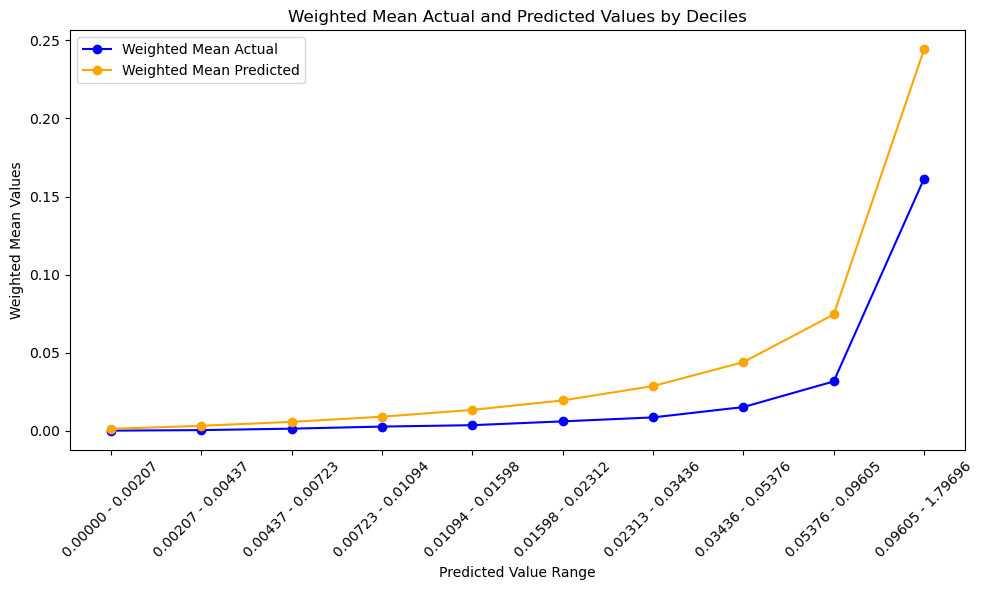

In [666]:
actual = y_test_tensor.numpy().flatten()
predicted = np.round(y_pred, 6)
weights = lives_exposure_test_tensor.numpy().flatten()

df_lift = pd.DataFrame({"actual": actual, "predicted": predicted, "weights": weights})
df_lift = df_lift.sort_values(by="predicted", ascending=False)

# Create deciles
df_lift["decile"] = pd.qcut(df_lift["predicted"], 10, labels=False)


def weighted_mean(group):
    return pd.Series(
        {
            "weighted_actual": np.average(group["actual"], weights=group["weights"]),
            "weighted_predicted": np.average(
                group["predicted"], weights=group["weights"]
            ),
            "range": f"{group['predicted'].min():.5f} - {group['predicted'].max():.5f}",
        }
    )


decile_summary = df_lift.groupby("decile").apply(weighted_mean)

# Plot the weighted mean actual and predicted values for each decile
plt.figure(figsize=(10, 6))
plt.plot(
    decile_summary["weighted_actual"],
    label="Weighted Mean Actual",
    color="blue",
    marker="o",
)
plt.plot(
    decile_summary["weighted_predicted"],
    label="Weighted Mean Predicted",
    color="orange",
    marker="o",
)
plt.xlabel("Predicted Value Range")
plt.ylabel("Weighted Mean Values")
plt.title("Weighted Mean Actual and Predicted Values by Deciles")
plt.xticks(ticks=range(10), labels=decile_summary["range"], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Other high level trends

C:\Users\u013709\AppData\Local\Temp\ipykernel_34320\2230546759.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


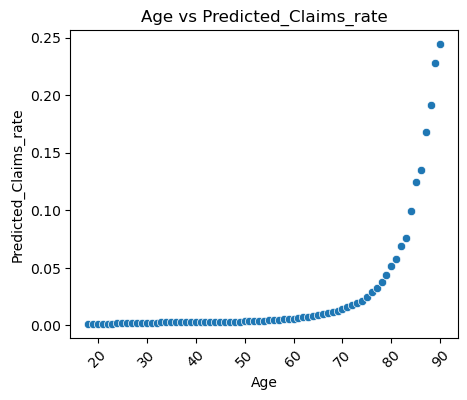

C:\Users\u013709\AppData\Local\Temp\ipykernel_34320\2230546759.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


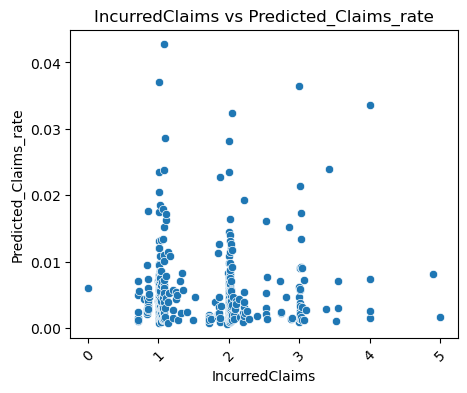

C:\Users\u013709\AppData\Local\Temp\ipykernel_34320\2230546759.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


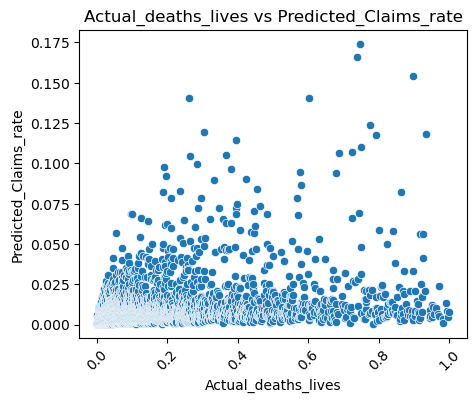

C:\Users\u013709\AppData\Local\Temp\ipykernel_34320\2230546759.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


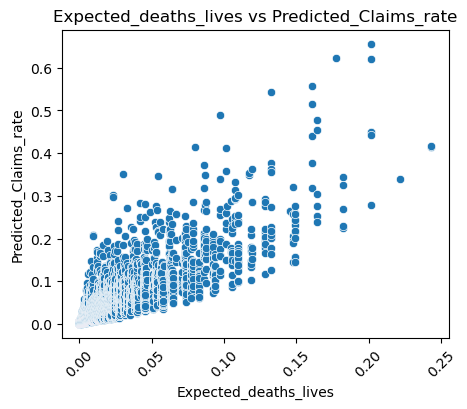

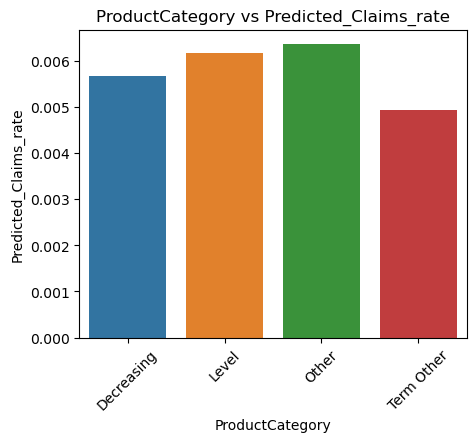

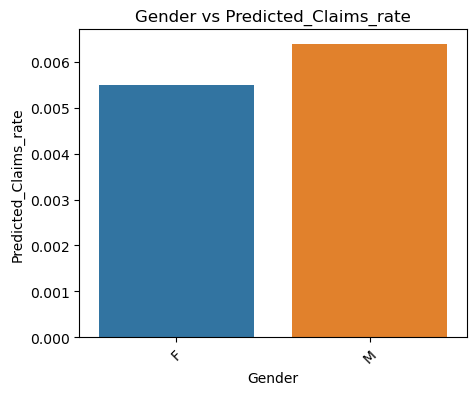

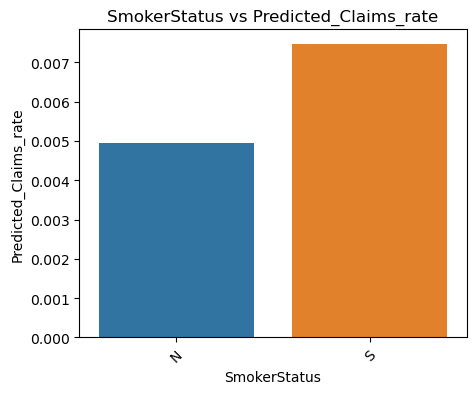

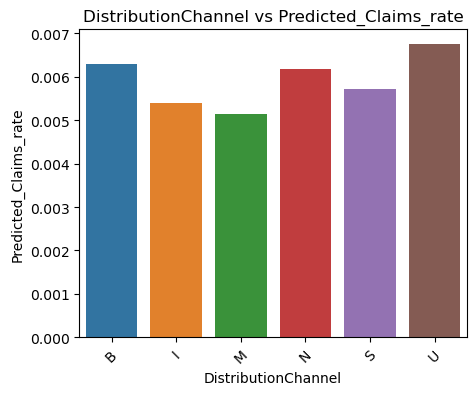

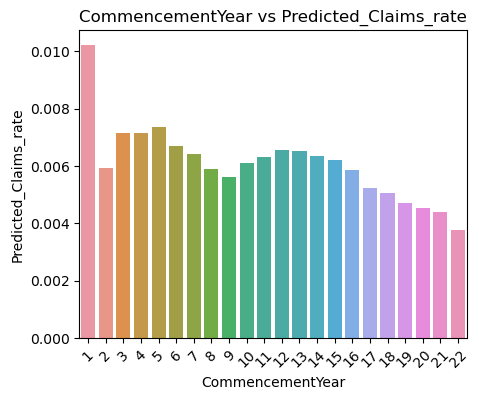

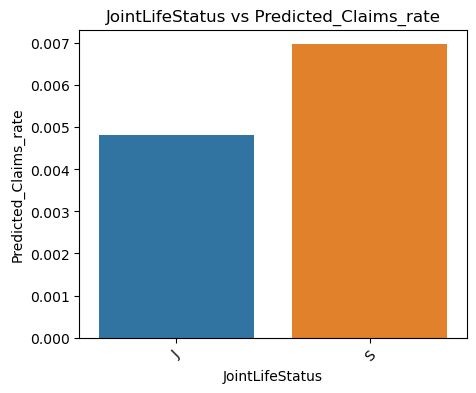

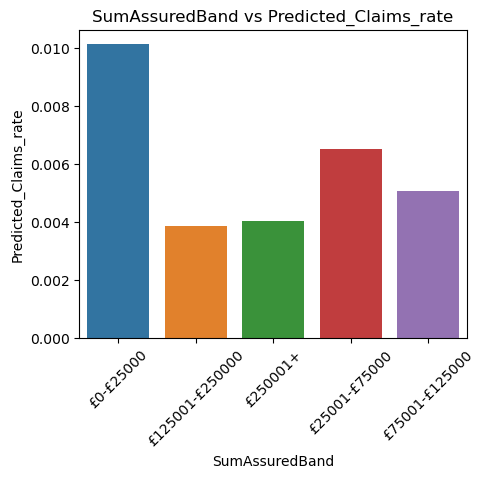

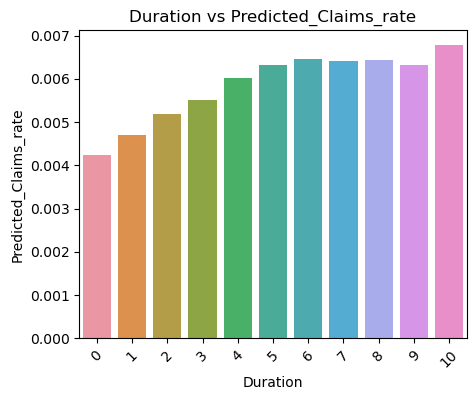

In [633]:
data = filtered_combined_df.drop(
    ["Actual_deaths", "Expected_deaths", "LivesExposure", "Predicted_Claims"], axis=1
).copy()


no_col = len(data.columns)
continuous_vars = []
categorical_vars = []
Target = "Predicted_Claims_rate"
for i, column in enumerate(data.drop([Target], axis=1).columns):
    if len(data[column].unique()) > 25:
        continuous_vars.append(column)
    else:
        categorical_vars.append(column)


for var in continuous_vars:
    plt.figure(figsize=(5, 4))
    ax = sns.scatterplot(
        x=var,
        y=f"{Target}",
        data=data[[f"{var}", f"{Target}"]].groupby([f"{var}"]).mean().reset_index(),
    )

    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.title(f"{var} vs {Target}")
    plt.show()

# Box plots for categorical variables vs target
for var in categorical_vars:
    plt.figure(figsize=(5, 4))
    ax = sns.barplot(
        x=var,
        y=f"{Target}",
        data=data[[f"{var}", f"{Target}"]].groupby([f"{var}"]).mean().reset_index(),
    )
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.title(f"{var} vs {Target}")
    plt.show()

plt.show()

##### With weights and using no offeset and using MSE ( should shift o PoissonNLLLoss)

In [637]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# rerunniung using weights
df = combined_df_encoded.copy()

# Extract weights and remove from features
weights = df["LivesExposure"].values
df = df.drop("LivesExposure", axis=1)
# df["expAge"] = np.exp(np.maximum(df["Age"] - 40, 0))
df["Age2"] = np.maximum(df["Age"] - 40, 0) ** 2

X = df.drop(["IncurredClaims", "Actual_deaths_lives"], axis=1)
y = df["Actual_deaths_lives"]
X_train, X_test, y_train, y_test, train_weights, test_weights = train_test_split(
    X, y, weights, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

# Convert data to tensors
X_train_tensor = torch.tensor(X_train_scaled.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values.reshape(-1, 1), dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values.reshape(-1, 1), dtype=torch.float32)
train_weights_tensor = torch.tensor(train_weights, dtype=torch.float32).reshape(-1, 1)
test_weights_tensor = torch.tensor(test_weights, dtype=torch.float32).reshape(-1, 1)


# NN with xutom loss as well as exp of age as an additional transfiorrmation
class Mort_Net(nn.Module):
    def __init__(self):
        super(Mort_Net, self).__init__()

        # Identify the indices of the specific columns
        self.age_idx = X_train_scaled.columns.get_loc("Age")
        self.duration_indices = [
            i
            for i, col in enumerate(X_train_scaled.columns)
            if col.startswith("Duration")
        ]
        self.commencement_year_indices = [
            i
            for i, col in enumerate(X_train_scaled.columns)
            if col.startswith("CommencementYear")
        ]

        # Define the fully connected layer
        interaction_input_size = (
            # 1
            # len([self.age_idx])
            +len(self.duration_indices)
            + len(self.commencement_year_indices)
        )
        self.fc2 = nn.Linear(
            len(X_train_scaled.columns) + interaction_input_size, 1
        )  # Include original features and interaction terms

        # self.relu = nn.ReLU()

    def forward(self, x):
        # Create interaction terms
        age_feature = x[:, self.age_idx].unsqueeze(1)
        interaction_terms = []  # torch.tensor(data=[], dtype=torch.float32)
        for idx in (
            self.duration_indices + self.commencement_year_indices  # + [self.age_idx]
        ):
            interaction_term = age_feature * x[:, idx].unsqueeze(1)
            interaction_terms.append(interaction_term)
            # print(interaction_term)

            # interaction_terms= torch.tensor(data=[], dtype=torch.float32)
            interaction_terms1 = torch.cat(interaction_terms, dim=1)
        # Concatenate the original features with interaction terms

        x_combined = torch.cat((x, interaction_terms1), dim=1)
        # print(f"interaction::{interaction_terms1[0:]}")
        # Final fully connected layer
        x = self.fc2(x_combined)
        x = torch.exp(x)  # self.relu(x)

        return x


model = Mort_Net()
criterion = nn.PoissonNLLLoss(log_input=False, reduce="None")
optimizer = optim.Adam(
    model.parameters(),
    lr=0.1,
    weight_decay=0.000026575843605813876,  # lr=0.096632744230624
)


# Custom loss function with weights
def weighted_poisson_loss(input, target, weight):
    return torch.mean(weight * criterion(input, target))


def l1_loss(model, lambda_l1):
    l1 = 0
    for param in model.parameters():
        l1 += torch.sum(torch.abs(param))
    return lambda_l1 * l1


for epoch in range(800):
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = weighted_poisson_loss(
        outputs, y_train_tensor, train_weights_tensor
    ) + l1_loss(model, lambda_l1=0.0008)
    loss.backward()
    optimizer.step()
    if (epoch % 20) == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item()}")

model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    loss = weighted_poisson_loss(outputs, y_test_tensor, test_weights_tensor)
    print(f"Test Loss: {loss.item()}")

c:\Anaconda3\Lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Epoch 1, Loss: 19.957712173461914
Epoch 21, Loss: 3.1099674701690674
Epoch 41, Loss: 1.2910387516021729
Epoch 61, Loss: 0.8359458446502686
Epoch 81, Loss: 0.6361019611358643
Epoch 101, Loss: 0.5191642045974731
Epoch 121, Loss: 0.4414381980895996
Epoch 141, Loss: 0.3863571584224701
Epoch 161, Loss: 0.3457047939300537
Epoch 181, Loss: 0.31477880477905273
Epoch 201, Loss: 0.29067671298980713
Epoch 221, Loss: 0.27151450514793396
Epoch 241, Loss: 0.25602206587791443
Epoch 261, Loss: 0.24331621825695038
Epoch 281, Loss: 0.23277141153812408
Epoch 301, Loss: 0.2239302545785904
Epoch 321, Loss: 0.2164583057165146
Epoch 341, Loss: 0.21008527278900146
Epoch 361, Loss: 0.2046079933643341
Epoch 381, Loss: 0.19986814260482788
Epoch 401, Loss: 0.19574111700057983
Epoch 421, Loss: 0.1921277791261673
Epoch 441, Loss: 0.18894872069358826
Epoch 461, Loss: 0.1861388385295868
Epoch 481, Loss: 0.18364499509334564
Epoch 501, Loss: 0.18142327666282654
Epoch 521, Loss: 0.1794368475675583
Epoch 541, Loss: 0.177

In [638]:
from sklearn.metrics import r2_score
import numpy as np

y_test_tensor = y_test_tensor + 1e-8
mean_target = torch.mean(test_weights_tensor * y_test_tensor)
null_deviance = 2 * torch.sum(
    test_weights_tensor * y_test_tensor * torch.log(y_test_tensor / mean_target)
    - test_weights_tensor * (y_test_tensor - mean_target)
)
model_deviance = 2 * torch.sum(
    test_weights_tensor * y_test_tensor * torch.log(y_test_tensor / outputs)
    - test_weights_tensor * (y_test_tensor - outputs)
)
poisson_deviance = null_deviance - model_deviance

# mean_target = torch.mean(y_test_tensor)
# null_deviance = 2 * torch.sum(y_test_tensor * torch.log(y_test_tensor/ mean_target) - (y_test_tensor - mean_target))
# model_deviance = 2 * torch.sum(y_test_tensor * torch.log(y_test_tensor / outputs) - (y_test_tensor - outputs))
# poisson_deviance = null_deviance - model_deviance
print(f"poisson deviance: {poisson_deviance}")
y_pred = outputs.numpy().flatten()

poisson deviance: 195020.890625


In [639]:
X_test_df = pd.DataFrame(X_test, columns=X_test.columns)
y_test_df = pd.DataFrame(
    y_test, columns=["Predicted_deaths_lives"]
)  # Expected_deaths_lives


test_df = pd.concat([X_test_df, y_test_df], axis=1)


test_df["Predicted_deaths_lives"] = y_pred


filtered_combined_df = combined_df.loc[test_df.index]

# Add the predicted values to the filtered combined DataFrame
filtered_combined_df["Predicted_deaths_lives"] = test_df[
    "Predicted_deaths_lives"
].values

filtered_combined_df.head(5)

,ProductCategory,Gender,SmokerStatus,DistributionChannel,CommencementYear,JointLifeStatus,SumAssuredBand,Age,Duration,LivesExposure,IncurredClaims,Actual_deaths,Actual_deaths_lives,Expected_deaths,Expected_deaths_lives,Predicted_deaths_lives
410655,Level,M,N,S,13,S,£250001+,45,5,16.013661,0.0,0.0,0.0,0.000628,0.000628,0.001986
1620761,Decreasing,F,N,U,21,J,£250001+,57,0,0.479452,0.0,0.0,0.0,0.000575,0.000575,0.001495
1397337,Level,M,N,N,19,J,£25001-£75000,25,1,1.380822,0.0,0.0,0.0,0.000196,0.000196,0.001324
2061625,Term Other,M,N,M,20,J,£25001-£75000,36,2,0.547541,0.0,0.0,0.0,0.000259,0.000259,0.001365
82314,Decreasing,F,N,B,15,S,£25001-£75000,44,3,27.308743,0.0,0.0,0.0,0.000458,0.000458,0.001797


In [640]:
X_test["Expected_deaths_lives"] = filtered_combined_df[
    filtered_combined_df.index.isin(X_test.index)
]["Expected_deaths_lives"]
X_test["Actual_deaths_lives"] = filtered_combined_df[
    filtered_combined_df.index.isin(X_test.index)
]["Actual_deaths_lives"]

In [641]:
actual_mean = np.sum(
    test_weights_tensor.numpy() * (y_test.values.reshape(-1, 1))
) / np.sum(test_weights_tensor.numpy())
predicted_mean = np.sum(test_weights_tensor.numpy() * (y_pred.reshape(-1, 1))) / np.sum(
    test_weights_tensor.numpy()
)
expected_deaths_mean = np.sum(
    test_weights_tensor.numpy()
    * (X_test["Expected_deaths_lives"].values.reshape(-1, 1))
) / np.sum(test_weights_tensor.numpy())
actual_deaths_mean = np.sum(
    test_weights_tensor.numpy() * (X_test["Actual_deaths_lives"].values.reshape(-1, 1))
) / np.sum(test_weights_tensor.numpy())
print(f"Actual Mean: {actual_mean}")
print(f"Predicted Mean: {predicted_mean}")
print(f"expected_deaths_mean: {expected_deaths_mean}")
print(f"actual_deaths_mean: {actual_deaths_mean}")

Actual Mean: 0.0012521916269368479
Predicted Mean: 0.002495927968993783
expected_deaths_mean: 0.0013106690841431636
actual_deaths_mean: 0.0012521916269368479


##### Plots to check high level trends ; partial dependence plots are added later

C:\Users\u013709\AppData\Local\Temp\ipykernel_34320\1404625257.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


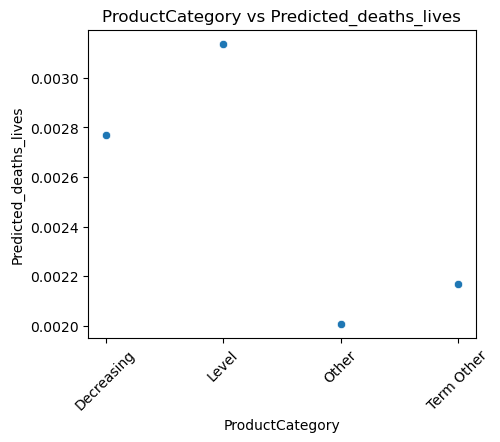

C:\Users\u013709\AppData\Local\Temp\ipykernel_34320\1404625257.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


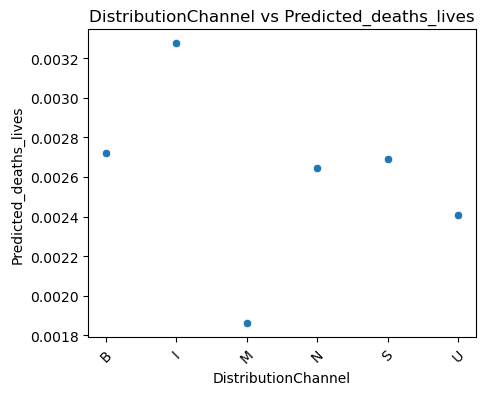

C:\Users\u013709\AppData\Local\Temp\ipykernel_34320\1404625257.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


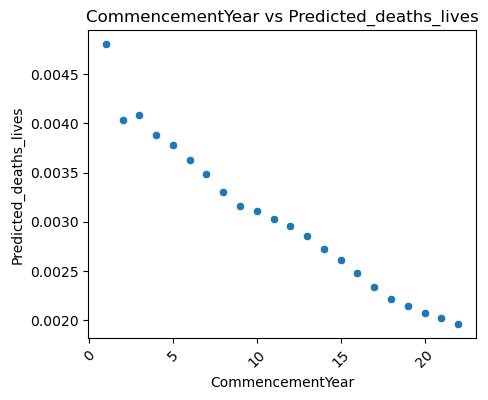

C:\Users\u013709\AppData\Local\Temp\ipykernel_34320\1404625257.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


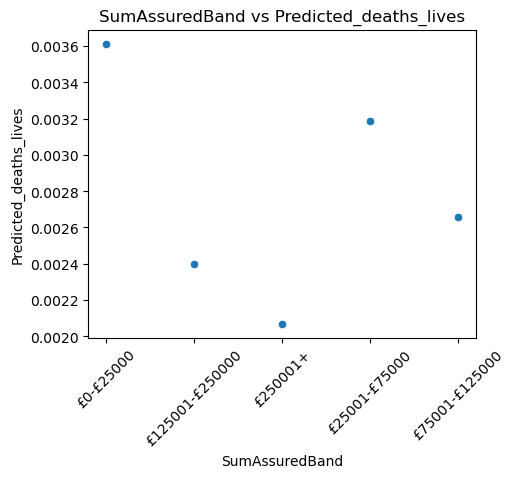

C:\Users\u013709\AppData\Local\Temp\ipykernel_34320\1404625257.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


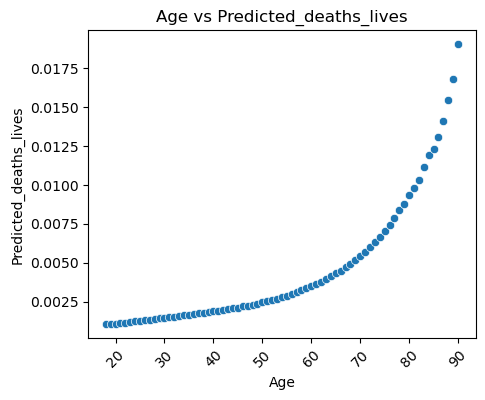

C:\Users\u013709\AppData\Local\Temp\ipykernel_34320\1404625257.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


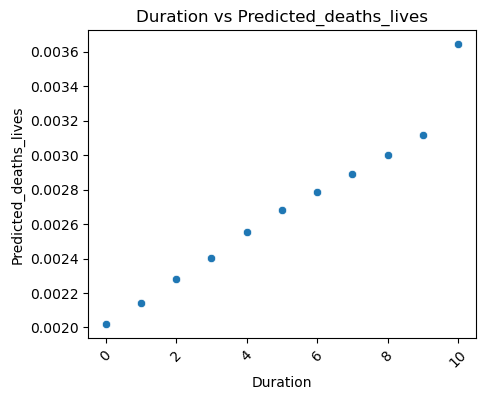

C:\Users\u013709\AppData\Local\Temp\ipykernel_34320\1404625257.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


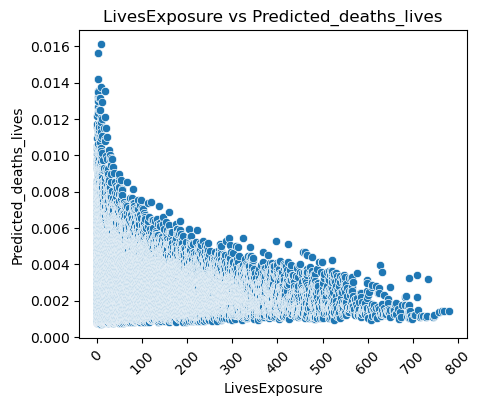

C:\Users\u013709\AppData\Local\Temp\ipykernel_34320\1404625257.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


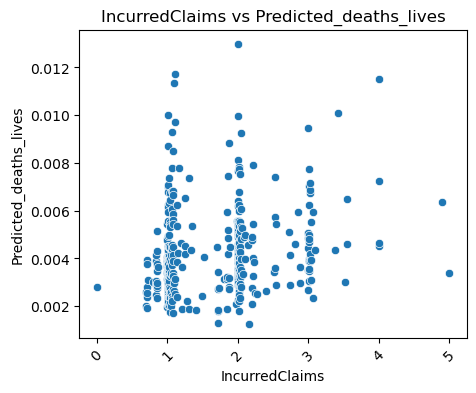

C:\Users\u013709\AppData\Local\Temp\ipykernel_34320\1404625257.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


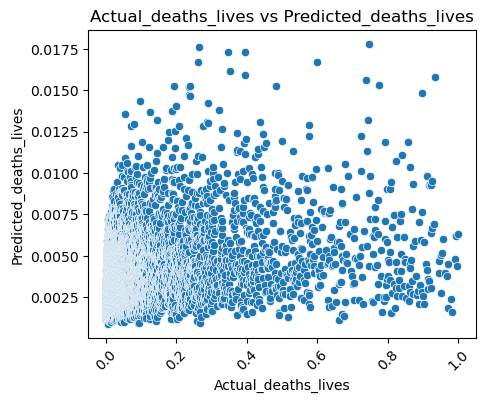

C:\Users\u013709\AppData\Local\Temp\ipykernel_34320\1404625257.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


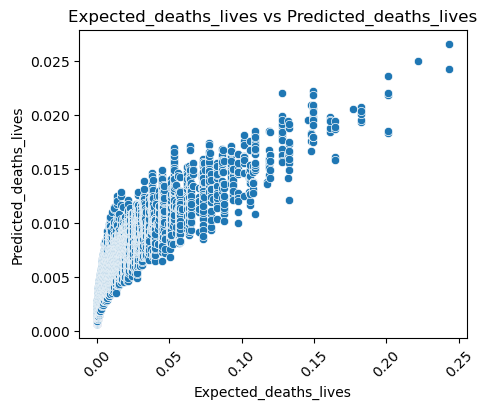

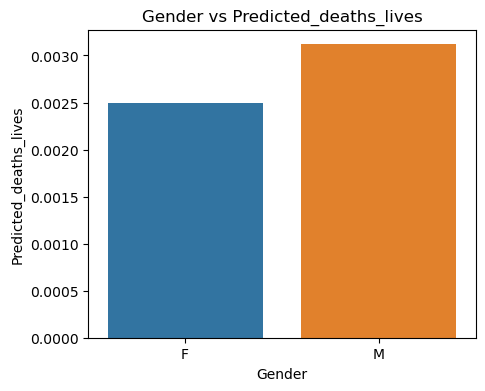

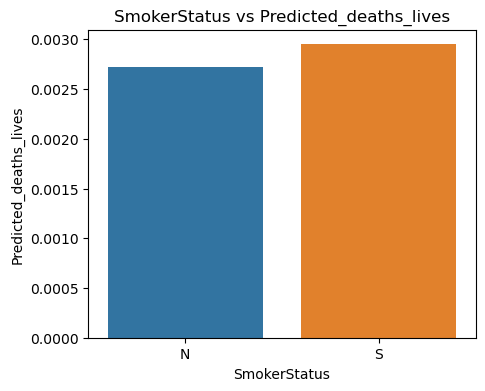

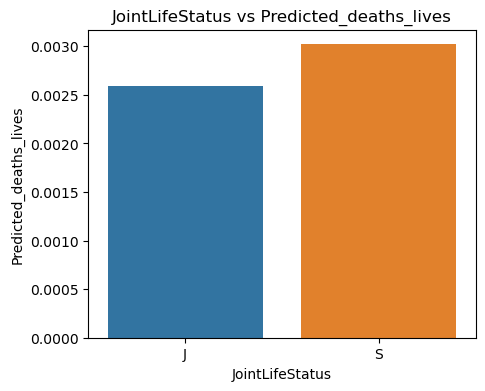

In [642]:
data = filtered_combined_df.drop(["Actual_deaths", "Expected_deaths"], axis=1).copy()
no_col = len(data.columns)
continuous_vars = []
categorical_vars = []
Target = "Predicted_deaths_lives"
for i, column in enumerate(data.drop([Target], axis=1).columns):
    if len(data[column].unique()) > 3:
        continuous_vars.append(column)
    else:
        categorical_vars.append(column)


for var in continuous_vars:
    plt.figure(figsize=(5, 4))
    ax = sns.scatterplot(
        x=var,
        y=f"{Target}",
        data=data[[f"{var}", f"{Target}"]].groupby([f"{var}"]).mean(),
    )
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.title(f"{var} vs {Target}")
    plt.show()

# Box plots for categorical variables vs target
for var in categorical_vars:
    plt.figure(figsize=(5, 4))
    ax = sns.barplot(
        x=var,
        y=f"{Target}",
        data=data[[f"{var}", f"{Target}"]].groupby([f"{var}"]).mean().reset_index(),
    )

    plt.title(f"{var} vs {Target}")
    plt.show()

plt.show()

In [ ]:
import optuna
from sklearn.metrics import r2_score


def objective(trial):
    global y_test_tensor
    lr = trial.suggest_float("lr", 1e-2, 1e-1, log=True)
    weight_decay = trial.suggest_float("weight_decay", 1e-5, 1e-2, log=True)
    num_epochs = trial.suggest_int("num_epochs", 350, 800)

    model = Mort_Net()
    criterion = nn.PoissonNLLLoss(log_input=False, reduction=None)
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train_tensor)
        loss = weighted_poisson_loss(outputs, y_train_tensor, train_weights_tensor)
        loss.backward()
        optimizer.step()

    model.eval()
    with torch.no_grad():
        outputs = model(X_test_tensor)
        # r2 = r2_score(y_test_tensor.numpy(), outputs.numpy())
        y_test_tensor = y_test_tensor + 1e-8
        mean_target = torch.mean(test_weights_tensor * y_test_tensor)
        null_deviance = 2 * torch.sum(
            test_weights_tensor * y_test_tensor * torch.log(y_test_tensor / mean_target)
            - test_weights_tensor * (y_test_tensor - mean_target)
        )
        model_deviance = 2 * torch.sum(
            test_weights_tensor * y_test_tensor * torch.log(y_test_tensor / outputs)
            - test_weights_tensor * (y_test_tensor - outputs)
        )
        poisson_deviance = null_deviance - model_deviance

    print(f"Poisson Deviance: {poisson_deviance.item():.4f}")
    print(
        f"LR: {lr} weight_decay: {weight_decay} num_epochs: {num_epochs}  mean {np.mean(outputs.numpy().flatten())} \
                std {np.std(outputs.numpy().flatten())}  poisson_deviance : {poisson_deviance}"
    )
    return poisson_deviance


# optimize the objective function
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=40)

print("Best hyperparameters: ", study.best_params)

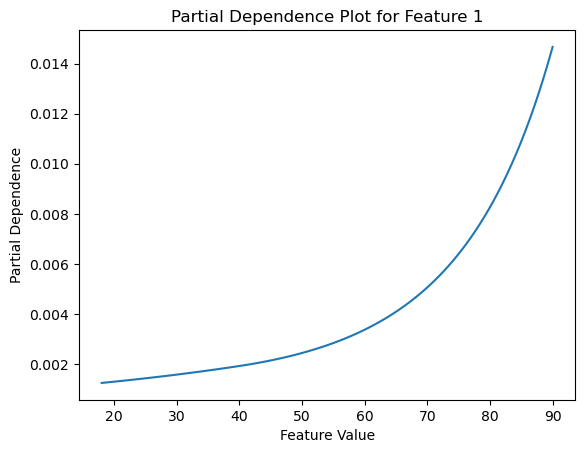

In [644]:
feature_index = X_train.columns.get_loc(
    "Age"
)  # Index of the feature for which to plot partial dependence
feature_index2 = X_train.columns.get_loc("Age2")
grid_values = np.linspace(
    X_train.iloc[:, feature_index].min(), X_train.iloc[:, feature_index].max(), 100
)


# Compute partial dependence
partial_dependence = []
for val in grid_values:
    X_temp = X_train.copy()
    # exposure = combined_df_encoded["LivesExposure"].copy()
    X_temp.iloc[:, feature_index] = val
    X_temp.iloc[:, feature_index2] = np.maximum(val - 40, 0) ** 2
    X_temp_scaled = scaler.transform(X_temp)
    model.eval()
    preds = model(
        torch.tensor(X_temp_scaled, dtype=torch.float32),
        # lives_exposure_train_tensor,
    )
    partial_dependence.append(preds.detach().numpy().mean())

# Plot the partial dependence
plt.plot(grid_values, partial_dependence)
plt.xlabel("Feature Value")
plt.ylabel("Partial Dependence")
plt.title("Partial Dependence Plot for Feature {}".format(feature_index))
plt.show()

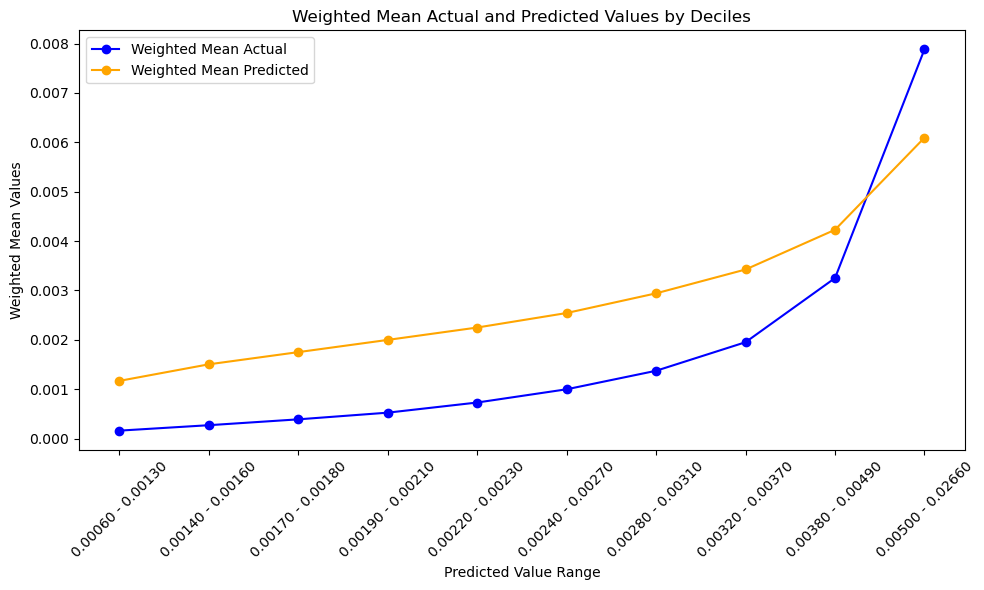

In [659]:
actual = y_test_tensor.numpy().flatten()
predicted = np.round(y_pred, 4)
weights = test_weights_tensor.numpy().flatten()

df_lift = pd.DataFrame({"actual": actual, "predicted": predicted, "weights": weights})
df_lift = df_lift.sort_values(by="predicted", ascending=False)

# Create deciles
df_lift["decile"] = pd.qcut(df_lift["predicted"], 10, labels=False)


def weighted_mean(group):
    return pd.Series(
        {
            "weighted_actual": np.average(group["actual"], weights=group["weights"]),
            "weighted_predicted": np.average(
                group["predicted"], weights=group["weights"]
            ),
            "range": f"{group['predicted'].min():.5f} - {group['predicted'].max():.5f}",
        }
    )


decile_summary = df_lift.groupby("decile").apply(weighted_mean)

# Plot the weighted mean actual and predicted values for each decile
plt.figure(figsize=(10, 6))
plt.plot(
    decile_summary["weighted_actual"],
    label="Weighted Mean Actual",
    color="blue",
    marker="o",
)
plt.plot(
    decile_summary["weighted_predicted"],
    label="Weighted Mean Predicted",
    color="orange",
    marker="o",
)
plt.xlabel("Predicted Value Range")
plt.ylabel("Weighted Mean Values")
plt.title("Weighted Mean Actual and Predicted Values by Deciles")
plt.xticks(ticks=range(10), labels=decile_summary["range"], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
plt.show()